In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Simple Thresholding

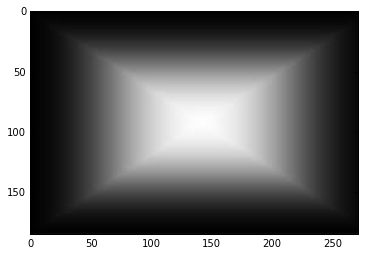

In [5]:
%matplotlib inline
img1 = cv2.imread('/home/manik/images/gradient1.jpeg')
plt.imshow(img1,'gray')

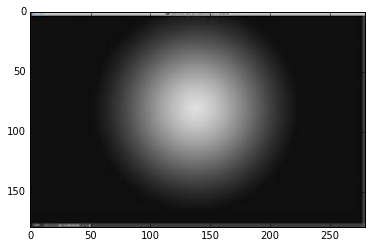

In [6]:
img2 = cv2.imread('/home/manik/images/gradient2.jpeg')
plt.imshow(img2,'gray')

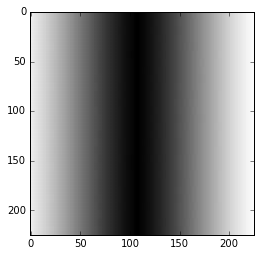

In [7]:
img3 = cv2.imread('/home/manik/images/gradient3.jpeg')
plt.imshow(img3,'gray')

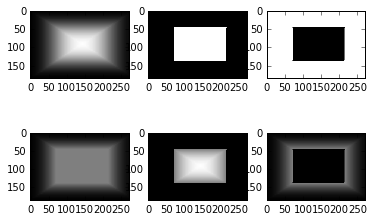

In [11]:
# The return value only matters for otsu's thresholding
ret, thresh1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img1,127,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img1,127,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img1,127,255,cv2.THRESH_TOZERO_INV)
images = [img1,thresh1,thresh2,thresh3,thresh4,thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')

In [15]:
# Can try out all this with the other 2 images as well

## Adaptive Thresholding
### 3 Params: Method, Block Size, Const(to be subtracted)

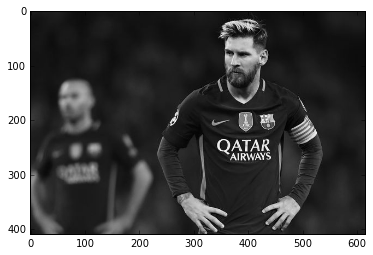

In [25]:
img1 = cv2.imread('/home/manik/images/messi1.jpg')
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img1_gray,'gray')

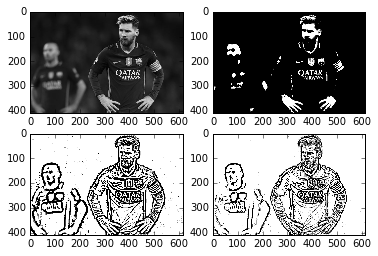

In [26]:
ret,thresh1 = cv2.threshold(img1_gray,127,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img1_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
thresh3 = cv2.adaptiveThreshold(img1_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
images = [img1_gray,thresh1,thresh2,thresh3]
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')

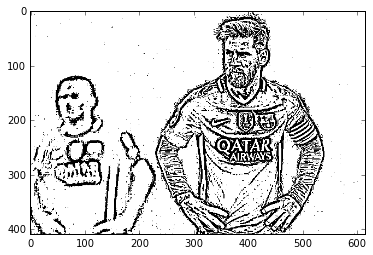

In [27]:
plt.imshow(thresh3,'gray')

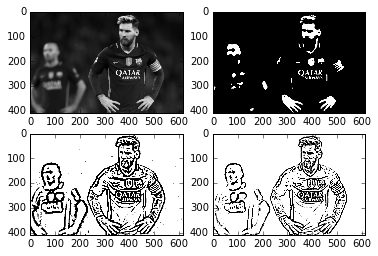

In [28]:
#The same thing now using median blur
img1_gray = cv2.medianBlur(img1_gray,5)
ret,thresh1 = cv2.threshold(img1_gray,127,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img1_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
thresh3 = cv2.adaptiveThreshold(img1_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
images = [img1_gray,thresh1,thresh2,thresh3]
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')

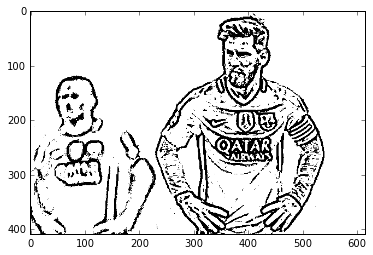

In [30]:
plt.imshow(thresh3,'gray')
#clearly this is much less noisy

### Now let's see otsu's binarization

In [31]:
img1 = cv2.imread('/home/manik/images/messi1.jpg')
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

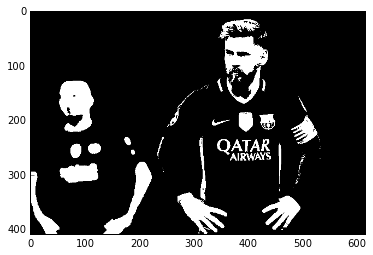

In [44]:
ret,thresh1 = cv2.threshold(img1_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh1,'gray')

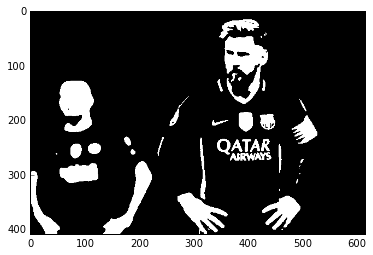

In [45]:
#same thing with gaussian blur
blur = cv2.GaussianBlur(img1_gray,(5,5),0)
ret,thresh3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh3,'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0acf466850>,
 <matplotlib.image.AxesImage at 0x7f0ad61043d0>)

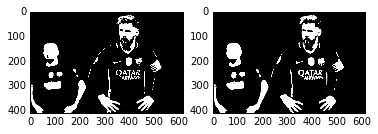

In [38]:
plt.subplot(1,2,1),plt.imshow(thresh1,'gray')
plt.subplot(1,2,2),plt.imshow(thresh3,'gray')

In [46]:
# The histogram is not useful in this case but in general it is
#plt.subplot(1,2,1),plt.hist(thresh1.ravel(),256,range=(254.9,255.1))
#plt.subplot(1,2,2),plt.hist(thresh3.ravel(),256,range=(254.9,255.1))